In [2]:
import numpy as np
import pandas as pd
import powerlaw

In [3]:
def power_law(x, C, alpha):
    return C * np.power(x, -alpha)

def remove_outliers(data, m=3,verbose = False):

    mean = np.mean(data)
    std = np.std(data)
    z_scores = np.abs((data - mean) / std)
    data_clean = data[z_scores < m]

    if verbose:
        print('Reject outliers: %.2f%%' % ((data.shape[0]- data_clean.shape[0])/data.shape[0]*100))
        print('Max before: %.2f, Max now: %.2f' % (np.max(data), np.max(data_clean)))
        print('Min before: %.2f, Min now: %.2f' % (np.min(data), np.min(data_clean)))
    return data_clean

In [4]:
device = 'cpu'
gen_dir = 'generated_data/'
models_dir = 'models/' 
results_dir = 'results/'

In [5]:
# Load data
data = np.load('master_data/data.npy')
train_batches = data.shape[0] # N hereafter. Number of training images in database.
length = data.shape[1] 
stocks = data.shape[2]
print('Number of training batches: ', train_batches)
print('Length of each batch: ', length)
print('Number of stocks: ', stocks)

Number of training batches:  79
Length of each batch:  256
Number of stocks:  434


In [6]:
vaeconv1 = np.load(gen_dir + 'vaeconv1.npy')
vaeconv3 = np.load(gen_dir + 'vaeconv3.npy')
vaefd1 = np.load(gen_dir + 'vaefd1.npy')
vaefd2 = np.load(gen_dir + 'vaefd2.npy')
vqvaeconv2 = np.load(gen_dir + 'vqvaeconv2.npy')
vqvaefd1 = np.load(gen_dir + 'vqvaefd1.npy')
timevaebase = np.load(gen_dir + 'timevaebase.npy')

In [7]:
generated = {
            'VQ VAE CONV2':vqvaeconv2,
            'VAE CONV1 ':vaeconv1,
             'VAE CONV3':vaeconv3,
             'VAE FD1':vaefd1,
             'VAE FD2':vaefd2,
             'VQ VAE FD1':vqvaefd1,
            'TIME VAE BASE':timevaebase
             }

In [8]:
index = [38, 25, 56, 24]
index

[38, 25, 56, 24]

In [9]:
data_eval = np.zeros((data.shape[0], data.shape[2], data.shape[1]))
# print(data_eval.shape)
for i in range(data.shape[0]):
    # print(i)
    batch = data[i, :, :].copy()
    batch = np.transpose(batch)
    data_eval[i] = batch
data_eval.shape

(79, 434, 256)

In [10]:
data_eval[0].shape

(434, 256)

Calculating best minimal value for power law fit


/Users/danielrzapatas/miniforge3/envs/torch-gpu/lib/python3.8/site-packages/powerlaw.py:1151: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data/self.xmin)))
/Users/danielrzapatas/miniforge3/envs/torch-gpu/lib/python3.8/site-packages/powerlaw.py:1170: RuntimeWarning: invalid value encountered in log
  return 1 + len(data)/sum(log(data / (self.xmin)))
/Users/danielrzapatas/miniforge3/envs/torch-gpu/lib/python3.8/site-packages/powerlaw.py:1151: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data/self.xmin)))


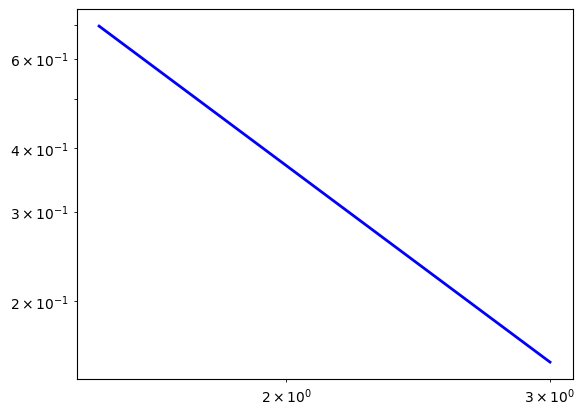

In [11]:
# generate a random sample from a normal distribution with numpy
sample = np.random.normal(size=1000)
# fit powerlaw
results = powerlaw.Fit(sample)
# plot
fig2 = results.plot_pdf(color='b', linewidth=2)

In [12]:
print('alpha= ', results.power_law.alpha)
print('sigma= ', results.power_law.sigma)

alpha=  4.806434611934634
sigma=  0.4282573527553702


In [68]:
alpha_list = []
sigma_list = []
for i in range(data_eval.shape[0]):
    data = data_eval[i].flatten()
    # data = remove_outliers(data)
    results = powerlaw.Fit(data)
    alpha = results.power_law.alpha
    sigma = results.power_law.sigma
    alpha_list.append(alpha)
    sigma_list.append(sigma)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


In [78]:
alpha_v = np.array(alpha_list)
sigma_v = np.array(sigma_list)
print('Alpha mean: ', np.mean(alpha_v))
print('Alpha std: ', np.std(alpha_v))
print('Alpha max: ', np.max(alpha_v))
print('Alpha min: ', np.min(alpha_v))
print('Alpha median: ', np.median(alpha_v))
print('Sigma mean: ', np.mean(sigma_list))
print('Sigma std: ', np.std(sigma_list))

Alpha mean:  4.339560017630649
Alpha std:  0.5002400713283446
Alpha max:  5.622530267810648
Alpha min:  3.706522496983923
Alpha median:  4.109760914131588
Sigma mean:  0.08742959183824371
Sigma std:  0.0433916916670467


In [77]:
for k, v in generated.items():
    data = v.flatten()
    # data = remove_outliers(data)
    results = powerlaw.Fit(data)
    # print(data.shape)
    alpha = results.power_law.alpha
    sigma = results.power_law.sigma
    print('Model: ', k)
    print('Alpha: ', alpha)
    print('Sigma: ', sigma)
    

Calculating best minimal value for power law fit
Model:  VQ VAE CONV2
Alpha:  3.321308863948025
Sigma:  0.022363740496113522
Calculating best minimal value for power law fit
Model:  VAE CONV1 
Alpha:  8.144926694999143
Sigma:  0.23949848695755177
Calculating best minimal value for power law fit


KeyboardInterrupt: 

Real data

Alpha mean:  4.339560017630649
Alpha std:  0.5002400713283446
Alpha max:  5.622530267810648
Alpha min:  3.706522496983923
Alpha median:  4.109760914131588
Sigma mean:  0.08742959183824371
Sigma std:  0.0433916916670467

Model:  VQ VAE CONV2
Alpha:  3.321308863948025
Sigma:  0.022363740496113522

Model:  VAE CONV1 
Alpha:  8.144926694999143
Sigma:  0.23949848695755177

Model:  VAE CONV3%
Alpha:  7.454042312180263
Sigma:  0.15653351861955797 

Model:  VAE FD199%
Alpha:  7.1163433183720155
Sigma:  0.2705710985132618

Model:  VAE FD299%
Alpha:  6.07630384298305
Sigma:  0.12990566499765752 

Model:  VQ VAE FD1
Alpha:  8.221156347656514
Sigma:  0.23704607028327984

Model:  TIME VAE BASE
Alpha:  6.415048788807046
Sigma:  0.15926614084726606 
